<a href="https://colab.research.google.com/github/rlaxogud0909/python-stock-data-analysis/blob/main/%EC%A6%9D%EA%B6%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 19.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2022-01-01') # 삼성전자
msft = pdr.get_data_yahoo('MSFT', start='2022-01-01') # 마이크로소프트

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sec.head(10)
# Adj Close: 수정 종가
# 수정 종가는 액면 분할 등으로 주식 가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식 가격에 맞춰 수정하여 표시한 가격

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,78700.0,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,77400.0,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,76900.0,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,78300.0,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,78000.0,9947422
2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.0,13221123
2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.0,11000502
2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.0,13889401
2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.0,10096725


In [ ]:
tmp_msft = msft.drop(columns='Volume') # 거래량 제거
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-02-22,285.000000,291.540009,284.500000,287.720001,287.720001
2022-02-23,290.179993,291.700012,280.100006,280.269989,280.269989
2022-02-24,272.510010,295.160004,271.519989,294.589996,294.589996
2022-02-25,295.140015,297.630005,291.649994,297.309998,297.309998
2022-02-28,294.309998,299.140015,293.000000,298.790009,298.790009


In [ ]:
len(sec.index) # 총 37
len(tmp_msft) # 총 39

39

In [ ]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


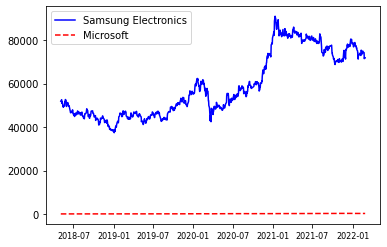

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04') # 삼성전자
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04') # 마이크로소프트

# 시각화
import matplotlib.pyplot as plt

# 삼성전자는 원, 마이크로소프트는 달러이기 때문에
# 마이크로소프트가 0에 가까운 직선으로 표시된다.
# 이는 수익률 비교가 어렵기 때문에 일간 변동률을 이용해 비교하는 법을 알아보자
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.xticks(fontsize=8)
plt.show()

In [ ]:
# 일간 변동률 (가격이 다른 두 주가의 수익률을 비교할 수 있음)
# 오늘 변동률 = ((오늘 종가 - 어제 종가) / 어제 종가) x 100
# 위 식은 시리즈 모듈에서 제공하는 shift() 함수를 사용하면 된다.

print(type(sec['Close'])) # 시리즈
print(sec['Close'])

<class 'pandas.core.series.Series'>
Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2022-02-22    74300.0
2022-02-23    74300.0
2022-02-24    71500.0
2022-02-25    71900.0
2022-02-28    71900.0
Name: Close, Length: 939, dtype: float64


In [ ]:
# shift() 함수
# 이것을 쓰는 이유: 어제 종가를 구하기 위해(5월 4일의 종가는 5월 8일의 어제 종가이다.)
sec['Close'].shift(1) # 데이터를 1줄 이동시킨다.

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2022-02-22    74300.0
2022-02-23    74300.0
2022-02-24    74300.0
2022-02-25    71500.0
2022-02-28    71900.0
Name: Close, Length: 939, dtype: float64

In [ ]:
# 일간 변동률
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [ ]:
# Nan은 향후 계산을 위해 0으로 변경할 필요가 있음
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

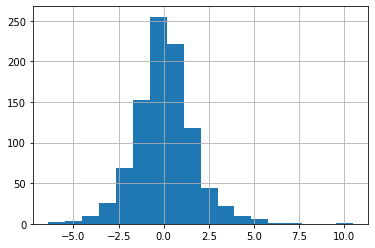

In [ ]:
# 주가 일간 변동률 히스토그램 (빈도)
import matplotlib.pyplot as plt

sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18) # bins는 구간을 의미함(디폴트값은 10)
plt.grid(True)
plt.show()

In [ ]:
# 급첨 분포: 정규분포보다 중앙 부분이 더 뽀족
# 펫 테일: 분포의 양쪽 꼬리가 더 두터운 것으로 알려짐

# 급첨 분포는 정규 분포와 비교했ㅇ르 때 주가의 움직임이 대부분 매우 작은 범위 안에서 발생
# 펫테일은 정규분포보다 큰 가격 변동이 발생

In [ ]:
sec_dpc.describe()
# 평균: 0.048243
# 표준편차: 1.649270

count    939.000000
mean       0.048243
std        1.649270
min       -6.387665
25%       -0.959299
50%        0.000000
75%        0.958259
max       10.470588
Name: Close, dtype: float64

In [ ]:
# 일간 변동률 누적합 구하기
# 종목별 전체 변동률을 비교해보려면 일간 변동률의 누적합을 계산해아함
# cumsum() 으로 누적합을 구할 수 있음
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs['2019-09-06'] # -7% 손실을 볼 수 있음

-7.505624131988454

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


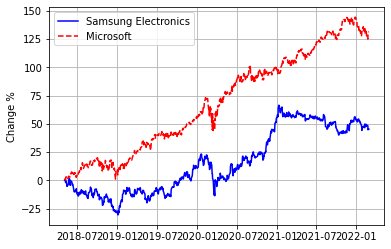

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04') # 삼성전자
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04') # 마이크로소프트
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

# 삼성전자와 마이크로소프트 주식 수익률 비교
# 2022-01 기준 마이크로소프트는 125% 이상, 삼성전자는 50% 이상의 수익률이 보인다.
import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
# 최대 손실 낙폭 (MDD)
# 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미 (특정 기간동안 얼마나 손실이 났는지)
# MDD = (최저점 - 최고점) / 최저점

In [ ]:
# rolling() 함수란
# 시리즈에서 윈도우 크기에 해당하는 개수만큼 데이터를 추출하여 집계 함수에 해당하는 연산을 실시함
# 집계 함수로는 max(), mean(), min()을 사용할 수 있음.
# min_periods를 지정하면 데이터 개수가 윈도우 크기에 못미치더라도 지정한 개수만 만족하면 연산을 수행한다.

[*********************100%***********************]  1 of 1 completed


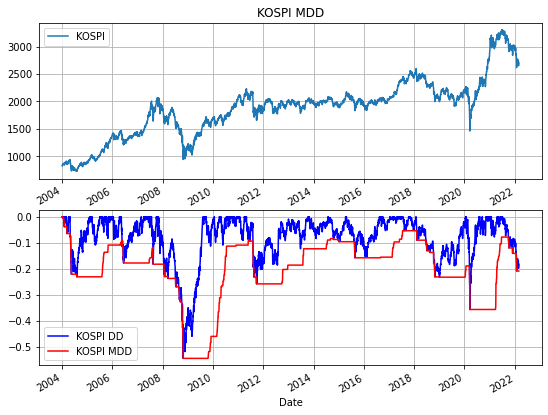

In [ ]:
# 코스피의 mdd 구하기
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo("^KS11", '2004-01-04')

# 산정기간 ( 1년동안 개장일을 252일로 어림잡음)
window = 252
# 1년 (거래일 기준) 기간 단위로 최고치 peak를 구함
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
# drawdown은 최고치(peak) 대비 현재 kospi 종가가 얼마나 하락햇는지 구함
drawdown = kospi['Adj Close']/peak - 1.0
# drawdown에서 1년 기간 단위로 최저치 max_dd를 구함 마이너스값이기 때문에 최저치가 바로 최대 손실 난폭이 됨
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9, 7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
kospi['Close'].plot(label='KOSPI', title ='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True) 
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True) 
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


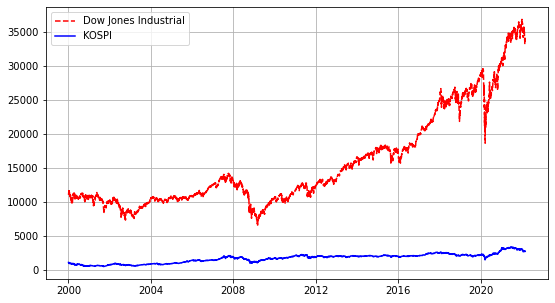

In [3]:
# kpspi와 다우존스 지수 비교
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04') # 다우존스
kospi = pdr.get_data_yahoo('^ks11', '2000-01-04') # 코스피

# 지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지 한눈에 알아보기 어려움
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

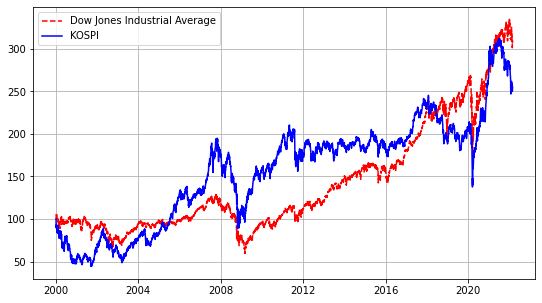

In [5]:
# 지수화 비교
# 오늘 종가를 2000년 1월 4일 종가로 나눈 뒤 100를 곱하면 2000년 1월 4일 대비 오늘의 변동률을 구할 수 있음 -> 지수화

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [10]:
# 산점도 분석
# plt.scatter(dow, kospi, maker='.') # 에러

print(len(dow), len(kospi)) # 산점도는 데이터 개수가 같아야하는데 데이터 개수가 다름

5574 5465


In [16]:
import pandas as pd

# 데이터 프레임은 빈값을 자동으로  nan값으로 채워준다.
df = pd.DataFrame({'Dow': dow['Close'], 'KOSPI': kospi['Close']})
df

,Dow,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2022-02-22,33596.609375,2706.790039
2022-02-23,33131.761719,2719.530029
2022-02-24,33223.828125,2648.800049


In [17]:
# 아직 산점도를 출력할려면 nan를 없애야하기 때문에
# fillna()의 bfill을 주면 뒤에 있는 값으로 NaN값을 덮어쓴다. (backward fill)
df = df.fillna(method='bfill')
df

,Dow,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2022-02-22,33596.609375,2706.790039
2022-02-23,33131.761719,2719.530029
2022-02-24,33223.828125,2648.800049


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


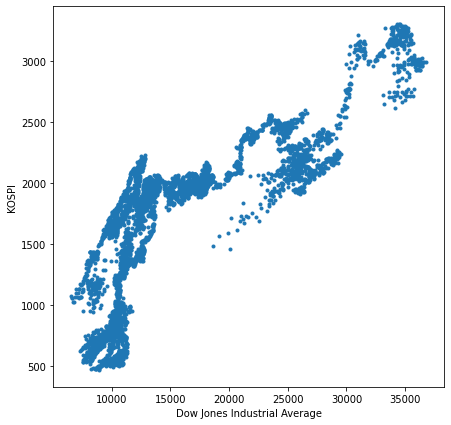

In [19]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04') # 다우존스
kospi = pdr.get_data_yahoo('^ks11', '2000-01-04') # 코스피

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill') # forward fill (앞에 값을 덮어씀)

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [20]:
!pip install scipy

In [21]:
# linregress() 함수를 이용하면 시리즈 객체 두 개만으로 간단한 선형 회귀모델을 생성하여 분석핤 수 있음
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr
# 기울기, y절편, r값(상관계수), p값, 표준편차

LinregressResult(slope=0.07637427960899178, intercept=464.7089381032431, rvalue=0.8218826781675697, pvalue=0.0, stderr=0.0006985845667866308)

In [22]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.821883
KOSPI,0.821883,1.000000


In [23]:
df['DOW'].corr(df['KOSPI'])

0.8218826781675699

In [26]:
# 결정계수
# 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수
# 상관계수의 제곱한 값
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2
r_squared
# 결정계수가 1이면 모든 표본 관측치가 추정된 회귀선 상에만 있다는 의미
# 결정계수가 0이면 추정된 회귀선이 변수 사이의 관계를 전혀 설명하지 못한다는 의미

0.6754911366718972

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


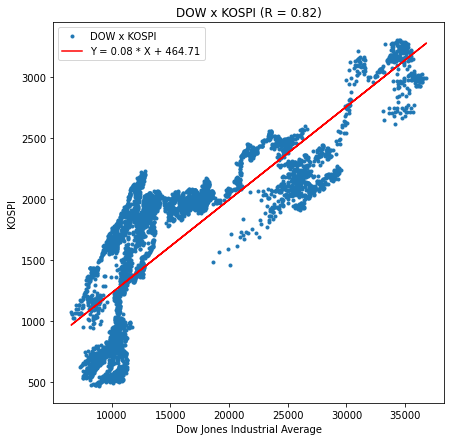

In [31]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt


dow = pdr.get_data_yahoo('^DJI', '2000-01-04') # 다우존스
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04') # 코스피

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()